In [1]:
import sympy as sp
import pylab as pl
import scipy.integrate as integrate
from AuxDisplay import *
from itertools import product

sp.init_printing(use_latex=True)

%matplotlib inline

# Definindo funções bases B-Spline

## 2.1 - Funções B-spline

Para um vetor de knots $\Xi$:

\begin{equation}
    \Xi = [\xi_0, \xi_1, ..., \xi_{n+p+1}]
\end{equation}

A i-ésima função de base B-spline de grau p, denotada por $N_{i, p}(x)$, é definida como:

\begin{equation}
N_{i,0}(x) = \left\{
\begin{matrix} 
1 & \mathrm{se} \quad \xi_i \leq x < \xi_{i+1} \\
0 & \mathrm{c.c.} 
\end{matrix}
\right.
\end{equation}

Para $p = 1, 2, ...$, define-se:

\begin{equation}
N_{i,p}(x) = \frac{x - \xi_i}{\xi_{i+p} - \xi_i} N_{i,p-1}(x) + \frac{\xi_{i+p+1} - x}{\xi_{i+p+1} - \xi_{i+1}} N_{i+1,p-1}(x)
\end{equation}

In [3]:
class Elemento:
    '''intervalo entre dois knots'''
    def __init__(s, l0, l1):
        s.l0 = l0
        s.l1 = l1
        s.N = None

    def em(x):
        return x >= s.l0 and x <= s.l1

    def __str__(s):
        return '[%f...%f] -> '%(s.l0, s.l1) + N.__str__()

In [4]:
def funcoesBases2(n, p, knots, plotar = False):
    '''Cria a n funcoes bases B-Spline de grau p para um vetor de knots'''
    N = [Elemento(knots[i], knots[i+1]) for i in range(len(knots)-1)]
    for n in N: print(n)
        
    ...
    
n = 4
p = 2
x = sp.Symbol('x')

knots = [0, 0, 0, 0.5, 1, 1, 1]
displayEq('\Xi', sp.Array(knots))

N = funcoesBases2(n, p, knots, plotar=True)

\Xi  = [0  0  0  0.5  1  1  1]

NameError: name 'N' is not defined

In [5]:
def funcoesBases(n, p, knots, plotar = False):
    '''Cria a n funcoes bases B-Spline de grau p para um vetor de knots'''
    N = [[Elemento() for _ in range(k)] for k in range(len(knots)-1, len(knots)-1-(p+1), -1)]
    display(N)
    if plotar: X = pl.linspace(knots[0], knots[-1], 200)
    for p in range(len(N)):
        if plotar: pl.figure('Funções de grau %d'%p)
        for i in range(len(N[p])):
            if p == 0:
                N[p][i] = (lambda i_: (lambda x: 1 if(x >= knots[i_] and x <= knots[i_+1]) else 0))(i)
#                 N[p][i] = (lambda i_: lambda x: sp.Piecewise(
#                     (0, x < knots[i_]),
#                     (0, x >= knots[i_+1]),
#                     ( 1, True )
#                 ))(i)
            else:
                p1, p2 = lambda x: 0, lambda x: 0
                if knots[i+p] != knots[i]:
                    p1 = (lambda i_, p_: lambda x: ((x-knots[i_])/(knots[i_+p_]-knots[i_]) * N[p_-1][i_](x)))(i, p)
                if knots[i+p+1] != knots[i+1]:
                    p2 = (lambda i_, p_: lambda x: ((knots[i_+p_+1]-x)/(knots[i_+p_+1]-knots[i_+1]) * N[p_-1][i_+1](x)))(i, p)
                    
#                 pl.plot(X, [p1(x).subs({x:k}) for k in X], label='p1 %d,%d'%(i, p))
#                 pl.plot(X, [p2(x).subs({x:k}) for k in X], '.-', label='p2 i=%d,p=%d'%(i, p))
#                 pl.plot(X, [N[p-1][i+1](x).subs({x:k}) for k in X], '--', label='N i=%d,p=%d'%(i+1, p-1))
                
#                 displayEq('N_{p=0,\ i=1}', N[0][1](x))
                N[p][i] = (lambda p1_, p2_: lambda x: p1_(x) + p2_(x))(p1, p2)
#                 displayEq('N_{p=0,\ i=1}', N[0][1](x))
            
#             displayEq('N_{p=%d,\ i=%d}'%(p, i), N[p][i](x))
                
#             if plotar: pl.plot(X, [N[p][i](x) for x in X], label='N %d,%d'%(i, p))
            if plotar: pl.plot(X, [N[p][i](x) for x in X], label='N %d,%d'%(i, p))
        if plotar:
            pl.grid()
            pl.title('Funções de grau %d'%p)
            pl.legend(loc='best')
            pl.show()
    return N

### Exemplo 1

In [6]:
n = 4
p = 2
x = sp.Symbol('x')

knots = [0, 0, 0, 0.5, 1, 1, 1]
displayEq('\Xi', sp.Array(knots))

# Pontos de controle em x
cp_x = [0.0, 0.5, 1.5, 2.0]

knt_spans = [(0, 3), (1, 4)]

N = funcoesBases(n, p, knots, plotar=True)[-1]

\Xi  = [0  0  0  0.5  1  1  1]

TypeError: __init__() missing 2 required positional arguments: 'l0' and 'l1'

In [7]:
A, E, x = sp.var('A, E, x')

m = 3

In [8]:
csi = sp.var('xi')
u1, u2, u3 = sp.var('u1:4')
# N1 = (2*csi-1)**2
# N2 = -2*csi*(3*csi-2)
# N3 = 2*csi**2
# N1, N2, N3 = N

# displayEq('N_1', N1)
# displayEq('N_2', N2)
# displayEq('N_3', N3)

# N = [N1, N2, N3]

In [9]:
ksa = cp_x[knt_spans[0][0]: knt_spans[0][1]]
Nsa =    N[knt_spans[0][0]: knt_spans[0][1]]
ksa, Nsa, N


NameError: name 'N' is not defined

In [10]:
disc = 5000
def diff1D(f, start, end, num = disc):
    eixo = pl.linspace(start, end, num, endpoint=False)
    y = [f(x) for x in eixo]
    dy = pl.diff(y) / pl.diff(eixo) 
#     pl.plot(eixo, y, 'b', label='y')
#     pl.plot(eixo[1:], dy, 'r--', label='dy')
#     pl.legend(loc='best')
#     pl.grid()
#     pl.show()
    return dy
    
# diff1D(pl.cos, 0, 5, 100)

from scipy.integrate import simps
# diff1D(H, -2, 2)
def integrate_f_1D(f, start, end, num = disc):
    eixo = pl.linspace(start, end, num)
    I = simps([H(i) for i in eixo], eixo)
    
    return I

def integrate_array_1D(y, start, end):
    x = pl.linspace(start, end, len(y))
    I = simps(y, x)
    
    return I

# integrate_f_1D(H, -2, 2)


In [11]:
# J = [ksa[i]*diff1D(N[i], 0, 1) for i in range(m)]
J = sum([ksa[i]*diff1D(N[i], 0, 0.5) for i in range(m)])

# J = sum([ksa[i]*diff1D(N[i], 0, 1) for i in range(m)])
# J = ksa[0]*sp.diff(N, x) + ksa[1]*sp.diff(N, x) + ksa[2]*sp.diff(N, x)
# J = 0*sp.diff(N[0], x) + 0.5*sp.diff(N[1], x) + 1.5*sp.diff(N[2], x)
# J = 0*sp.diff(N[0], csi) + 0.5*sp.diff(N[1], csi) + 1.5*sp.diff(N[2], csi)
# displayEq('J', J, J.subs({x:0}))
# J = J.subs({x:0})
# J

NameError: name 'N' is not defined

In [12]:
k = sp.zeros(3)
for i, j in product(range(m), repeat = 2):
#     k[i, j] = A*E * sp.Integral( 
#         sp.Derivative(sp.var('N_%d'%i), x) *
#         sp.Derivative(sp.var('N_%d'%j), x),
#         (x, 0, 0.5)
#     )
    k[i, j] = A * E * round(integrate_array_1D( 
        diff1D(N[i], 0, 0.5) *
        diff1D(N[j], 0, 0.5) / (J),
        0, 0.5
    ), 4)

displayEq('k', k)

NameError: name 'N' is not defined

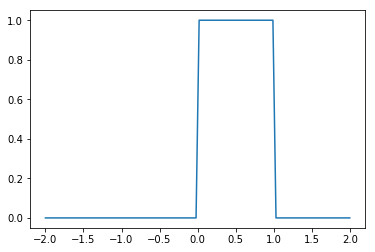

In [13]:
H = lambda x: 1 if(x > 0 and x < 1) else 0
x = pl.linspace(-2, 2, 100)
pl.plot(x, [H(i) for i in x])
pl.show()


In [ ]:
x.__str__()